In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 96% 156M/163M [00:00<00:00, 169MB/s]
100% 163M/163M [00:00<00:00, 189MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data		       kaggle.json  test1.jpg	test2.jpg  WIN_20231101_22_29_38_Pro.jpg
face-mask-dataset.zip  sample_data  test1.webp	test3.jpg


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_505.jpg', 'with_mask_2540.jpg', 'with_mask_1129.jpg', 'with_mask_3640.jpg', 'with_mask_3692.jpg']
['with_mask_1166.jpg', 'with_mask_923.jpg', 'with_mask_3171.jpg', 'with_mask_3120.jpg', 'with_mask_1790.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2045.jpg', 'without_mask_2632.jpg', 'without_mask_3629.jpg', 'without_mask_1450.jpg', 'without_mask_3174.jpg']
['without_mask_1970.jpg', 'without_mask_959.jpg', 'without_mask_1672.jpg', 'without_mask_2545.jpg', 'without_mask_499.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:

print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

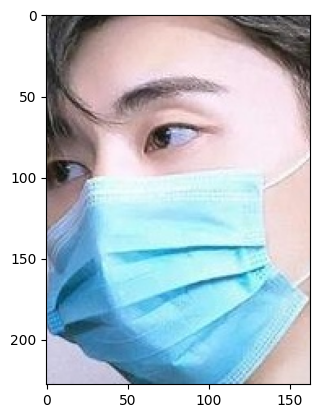

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

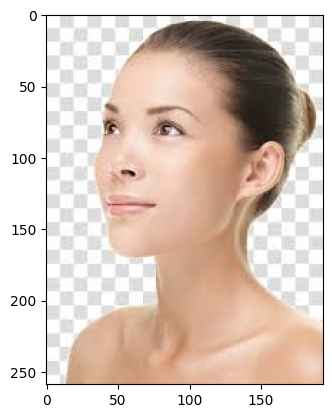

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

In [19]:
data[0]

array([[[190, 165, 143],
        [189, 164, 142],
        [191, 166, 144],
        ...,
        [174, 146, 122],
        [174, 146, 120],
        [175, 145, 120]],

       [[189, 164, 142],
        [189, 164, 142],
        [189, 164, 142],
        ...,
        [176, 148, 121],
        [175, 148, 120],
        [173, 142, 116]],

       [[187, 165, 142],
        [188, 165, 142],
        [188, 165, 142],
        ...,
        [175, 148, 121],
        [175, 147, 120],
        [158, 127,  99]],

       ...,

       [[217, 193, 185],
        [216, 191, 183],
        [216, 191, 182],
        ...,
        [ 67,  70,  71],
        [ 69,  72,  74],
        [ 72,  73,  75]],

       [[199, 178, 172],
        [211, 189, 183],
        [214, 189, 183],
        ...,
        [ 68,  72,  72],
        [ 70,  74,  75],
        [ 72,  75,  76]],

       [[ 91,  75,  70],
        [165, 146, 140],
        [204, 181, 175],
        ...,
        [ 70,  74,  75],
        [ 73,  78,  79],
        [ 75,  78,  79]]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [30]:
X_train[0]

array([[[141, 139, 142],
        [139, 137, 140],
        [136, 134, 137],
        ...,
        [227, 240, 246],
        [227, 240, 246],
        [227, 240, 246]],

       [[141, 139, 142],
        [138, 136, 139],
        [136, 134, 137],
        ...,
        [227, 240, 246],
        [227, 240, 246],
        [227, 240, 246]],

       [[140, 138, 141],
        [138, 136, 139],
        [136, 134, 137],
        ...,
        [227, 240, 246],
        [227, 240, 246],
        [227, 240, 246]],

       ...,

       [[219, 177, 153],
        [218, 176, 152],
        [216, 174, 150],
        ...,
        [ 31,  18,  17],
        [ 26,  16,  18],
        [ 43,  32,  35]],

       [[222, 180, 156],
        [221, 179, 155],
        [221, 179, 155],
        ...,
        [ 16,  14,  12],
        [ 18,  19,  21],
        [ 23,  25,  27]],

       [[224, 182, 158],
        [222, 180, 156],
        [223, 181, 157],
        ...,
        [ 25,  23,  20],
        [ 29,  28,  30],
        [ 28,  28,  30]]

In [31]:
X_train_scaled[0]

array([[[0.55294118, 0.54509804, 0.55686275],
        [0.54509804, 0.5372549 , 0.54901961],
        [0.53333333, 0.5254902 , 0.5372549 ],
        ...,
        [0.89019608, 0.94117647, 0.96470588],
        [0.89019608, 0.94117647, 0.96470588],
        [0.89019608, 0.94117647, 0.96470588]],

       [[0.55294118, 0.54509804, 0.55686275],
        [0.54117647, 0.53333333, 0.54509804],
        [0.53333333, 0.5254902 , 0.5372549 ],
        ...,
        [0.89019608, 0.94117647, 0.96470588],
        [0.89019608, 0.94117647, 0.96470588],
        [0.89019608, 0.94117647, 0.96470588]],

       [[0.54901961, 0.54117647, 0.55294118],
        [0.54117647, 0.53333333, 0.54509804],
        [0.53333333, 0.5254902 , 0.5372549 ],
        ...,
        [0.89019608, 0.94117647, 0.96470588],
        [0.89019608, 0.94117647, 0.96470588],
        [0.89019608, 0.94117647, 0.96470588]],

       ...,

       [[0.85882353, 0.69411765, 0.6       ],
        [0.85490196, 0.69019608, 0.59607843],
        [0.84705882, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 [==============================] - 187s 1s/step - loss: 0.4295 - acc: 0.8199 - val_loss: 0.2542 - val_acc: 0.8909
Epoch 2/10
170/170 [==============================] - 177s 1s/step - loss: 0.2671 - acc: 0.8930 - val_loss: 0.2108 - val_acc: 0.9124
Epoch 3/10
170/170 [==============================] - 174s 1s/step - loss: 0.2284 - acc: 0.9099 - val_loss: 0.1840 - val_acc: 0.9289
Epoch 4/10
170/170 [==============================] - 173s 1s/step - loss: 0.1766 - acc: 0.9323 - val_loss: 0.2008 - val_acc: 0.9306
Epoch 5/10
170/170 [==============================] - 174s 1s/step - loss: 0.1458 - acc: 0.9456 - val_loss: 0.1820 - val_acc: 0.9438
Epoch 6/10
170/170 [==============================] - 167s 983ms/step - loss: 0.1415 - acc: 0.9481 - val_loss: 0.2039 - val_acc: 0.9322
Epoch 7/10
170/170 [==============================] - 171s 1s/step - loss: 0.0933 - acc: 0.9684 - val_loss: 0.2057 - val_acc: 0.9488
Epoch 8/10
170/170 [==============================] - 169s 998ms/s

**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 20s 403ms/step - loss: 0.2810 - acc: 0.9272
Test Accuracy = 0.9272005558013916


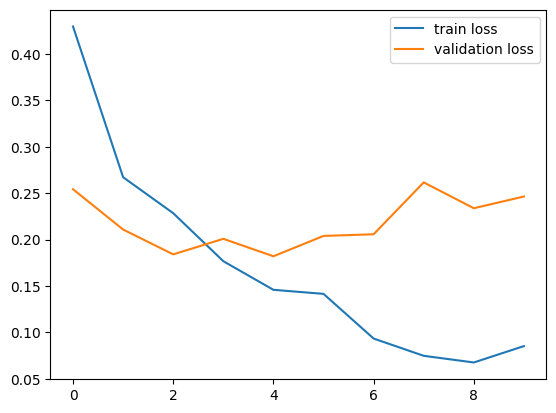

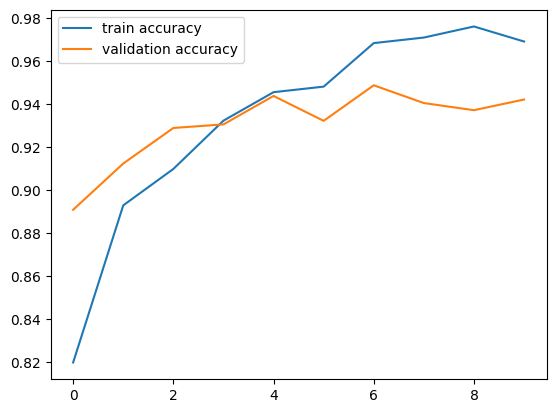

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test3.jpg


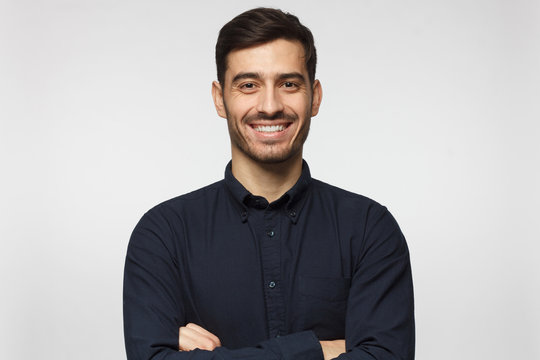

1/1 [==============================] - 0s 168ms/step
[[0.6910257  0.23236556]]
0
The person in the image is not wearing a mask


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test4.jpg


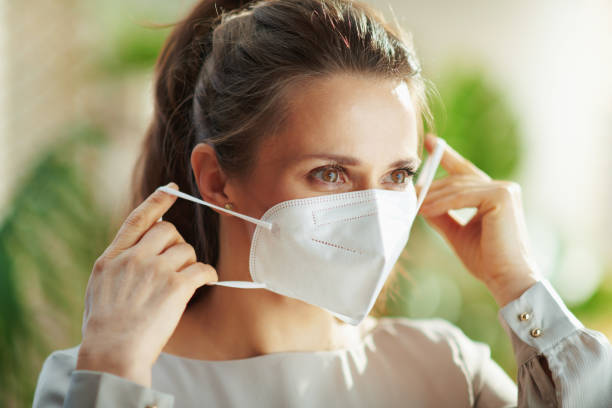

1/1 [==============================] - 0s 76ms/step
[[0.48646292 0.60673714]]
1
The person in the image is wearing a mask


In [51]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')